In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:28<00:00, 43.5MB/s]
100% 1.06G/1.06G [00:28<00:00, 39.9MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Dropout, Flatten,BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode = 'int',
    color_mode='rgb',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode = 'int',
    color_mode='rgb',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
def normalizee(image,label):
  img = tf.cast(image/255, tf.float32)
  return img, label
train_ds = train_ds.map(normalizee)
validation_ds = validation_ds.map(normalizee)

In [ ]:
for i in train_ds:
  print(i)

In [ ]:
from tensorflow.keras import layers, models
model = Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', padding='valid', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary( )

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                     

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 80s 126ms/step - loss: 5.4763 - accuracy: 0.5768 - val_loss: 0.6357 - val_accuracy: 0.6230
Epoch 2/10
625/625 [==============================] - 79s 125ms/step - loss: 0.6400 - accuracy: 0.6460 - val_loss: 0.5985 - val_accuracy: 0.6590
Epoch 3/10
625/625 [==============================] - 79s 126ms/step - loss: 0.5974 - accuracy: 0.6841 - val_loss: 0.5786 - val_accuracy: 0.6734
Epoch 4/10
625/625 [==============================] - 79s 125ms/step - loss: 0.5421 - accuracy: 0.7195 - val_loss: 0.5364 - val_accuracy: 0.7356
Epoch 5/10
625/625 [==============================] - 79s 125ms/step - loss: 0.4946 - accuracy: 0.7566 - val_loss: 0.5463 - val_accuracy: 0.6864
Epoch 6/10
625/625 [==============================] - 79s 126ms/step - loss: 0.4424 - accuracy: 0.7946 - val_loss: 0.4826 - val_accuracy: 0.7786
Epoch 7/10
625/625 [==============================] - 79s 126ms/step - loss: 0.4352 - accuracy: 0.8002 - val_loss: 0.4992 - val_ac

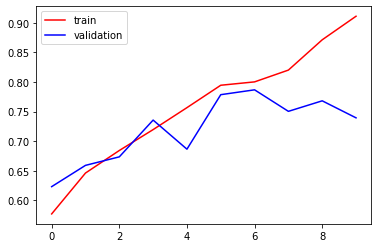

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

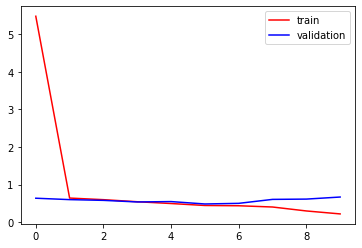

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

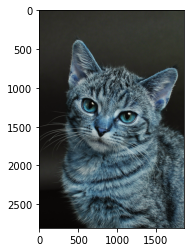

In [106]:
import cv2
img = cv2.imread('/content/cat.jpg')
plt.imshow(img)

In [107]:
img = cv2.resize(img, (256,256))

In [108]:
img = img.reshape((1,256,256,3))

In [109]:
model.predict(img)

1/1 [==============================] - 0s 22ms/step


array([[0.]], dtype=float32)